<a href="https://colab.research.google.com/github/cantaruttim/Learning_Python/blob/main/Finance_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import numpy as np

In [8]:
# Parameter Values
S0 = 100. # initial index level
K = 105. # strike price
T = 1.0 # time-to-maturity
r = 0.05 # riskless short rate
sigma = 0.2 # volatility

for I in range(100000):
  # Valuation Algorithm
  z = np.random.standard_normal(I) # pseudo-random numbers
  # index values at maturity
  ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * math.sqrt(T) * z)
  hT = np.maximum(ST - K, 0) # payoff at maturity
  C0 = math.exp(-r * T) * np.mean(hT) # Monte Carlo estimator
  # Result Output
print('Value of the European call option %5.3f.' % C0)

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Value of the European call option 7.990.


In [9]:
import numpy as np
import pandas as pd
from pylab import plt, mpl

In [ ]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [11]:
data = pd.read_csv('/content/tr_eikon_eod_data.csv',
index_col=0, parse_dates=True)
data = pd.DataFrame(data['.SPX'])
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1972 entries, 2010-01-04 to 2017-10-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   .SPX    1972 non-null   float64
dtypes: float64(1)
memory usage: 30.8 KB


In [15]:
display(data)

,.SPX,rets,vola
Date,,,
2010-01-04,1132.99,NaN,NaN
2010-01-05,1136.52,0.003111,NaN
2010-01-06,1137.14,0.000545,NaN
2010-01-07,1141.69,0.003993,NaN
2010-01-08,1144.98,0.002878,NaN
...,...,...,...
2017-10-25,2557.15,-0.004674,0.072548
2017-10-26,2560.40,0.001270,0.072509
2017-10-27,2581.07,0.008041,0.072782


In [12]:
data['rets'] = np.log(data / data.shift(1))
data['vola'] = data['rets'].rolling(252).std() * np.sqrt(252)

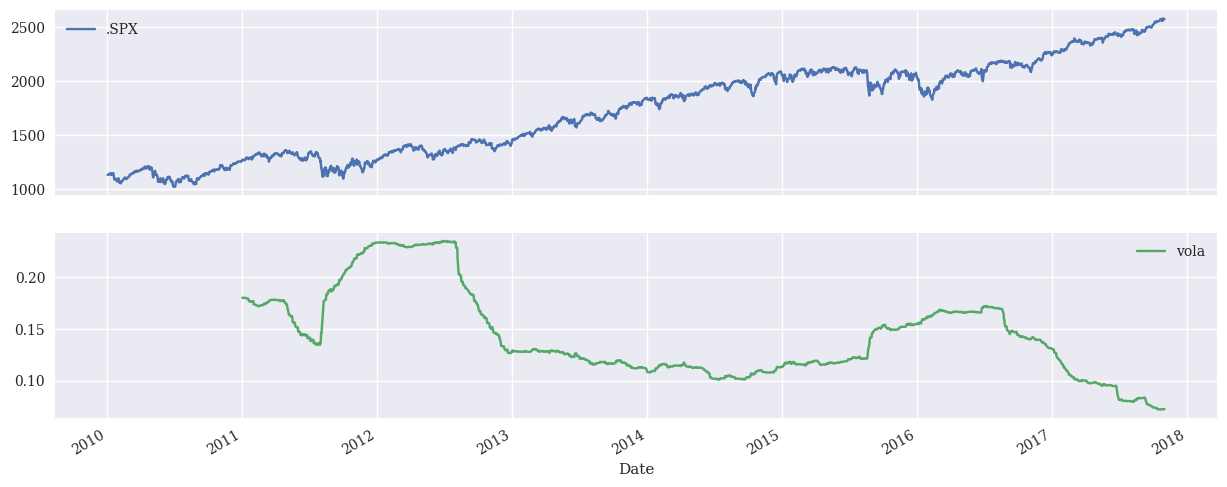

In [16]:
data[['.SPX', 'vola']].plot(subplots=True, figsize=(15, 6));

In [20]:
import math
loops = 2500000
a = range(1, loops)

def f(x):
  return 3 * math.log(x) + math.cos(x) ** 2
%timeit r = [f(x) for x in a]

1.01 s ± 197 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Using NumPy considerably reduces the execution time to about 88 milliseconds. However, there is even a package specifically dedicated to this kind of task. It is called numexpr, for “numerical expressions.” It compiles the expression to improve upon the
performance of the general NumPy functionality by, for example, avoiding in-memory copies of ndarray objects along the way:

In [22]:
import numexpr as ne
ne.set_num_threads(1)
f = '3 * log(a) + cos(a) ** 2'
%timeit r = ne.evaluate(f)

227 ms ± 8.25 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [23]:
ne.set_num_threads(4)
%timeit r = ne.evaluate(f)

221 ms ± 3.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Data-Driven and AI-First Finance

### Data Driven Finance

Some of the most important financial theories, such as MPT and CAPM, date as far back as to the 1950s and 1960s.

The scientific method, say in physics, starts with data, for example from experiments or observations, and moves on to hypotheses and theories that are then tested against the data. If the tests are positive, the hypotheses and theories might be refined and
properly written down, for instance, in the form of a research paper for publication. If the tests are negative, the hypotheses and theories are rejected and the search begins anew for ones that conform with the data.

In [5]:
import numpy as np
import pandas as pd

- Selects historical end-of-day data for the Apple Inc. stock (AAPL.O)

- Calculates the log returns over the complete history.

- Generates DataFrame columns with directional lagged log return data (+1 or -1).

In [6]:
data = pd.read_csv('/content/tr_eikon_eod_data.csv', index_col=0, parse_dates=True)
data = pd.DataFrame(data['AAPL.O'])
data['Returns'] = np.log(data / data.shift())
data.dropna(inplace=True)

lags = 6

cols = []

for lag in range(1, lags + 1):
  col = 'lag_{}'.format(lag)
  data[col] = np.sign(data['Returns'].shift(lag))
  cols.append(col)
data.dropna(inplace=True)

In [35]:
data

,AAPL.O,Returns,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6
Date,,,,,,,,
2010-01-13,30.092827,0.014007,-1.0,-1.0,1.0,-1.0,-1.0,1.0
2010-01-14,29.918542,-0.005808,1.0,-1.0,-1.0,1.0,-1.0,-1.0
2010-01-15,29.418542,-0.016853,-1.0,1.0,-1.0,-1.0,1.0,-1.0
2010-01-19,30.719969,0.043288,-1.0,-1.0,1.0,-1.0,-1.0,1.0
2010-01-20,30.246398,-0.015536,1.0,-1.0,-1.0,1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...
2017-10-25,156.410000,-0.004402,1.0,-1.0,1.0,-1.0,-1.0,1.0
2017-10-26,157.410000,0.006373,-1.0,1.0,-1.0,1.0,-1.0,-1.0
2017-10-27,163.050000,0.035203,1.0,-1.0,1.0,-1.0,1.0,-1.0


- Instantiates the model object.

- Fits the model, given the features and the label data (all directional).

- Uses the fitted model to create the predictions (in-sample), which are the positions of the trading strategy at the same time (long or short).

- Calculates the log returns of the trading strategy given the prediction values and the benchmark log returns.

- Plots the performance of the ML-based trading strategy compared to the performance of the passive benchmark investment.

In [39]:
from sklearn.svm import SVC
model = SVC(gamma='auto')

model.fit(data[cols], np.sign(data['Returns']))
SVC(C=1.0, cache_size=200, coef0=0.0, decision_function_shape='ovr', 
    degree=3, gamma='auto', kernel='rbf', max_iter=-1, probability=False, 
    shrinking=True, tol=0.001, verbose=True)

SVC(gamma='auto', verbose=True)

In [40]:
data['Prediction'] = model.predict(data[cols])
data['Strategy'] = data['Prediction'] * data['Returns']

Plots the performance of the ML-based trading strategy compared to the performance of the passive benchmark investment.

The simplified approach taken here does not account for transaction costs, nor does it separate the data set into training and testing subsets. However, it shows how straightforward the application of ML algorithms to financial data is, at least in a technical sense; practically, a number of important topics need to be considered (see
López de Prado (2018)).

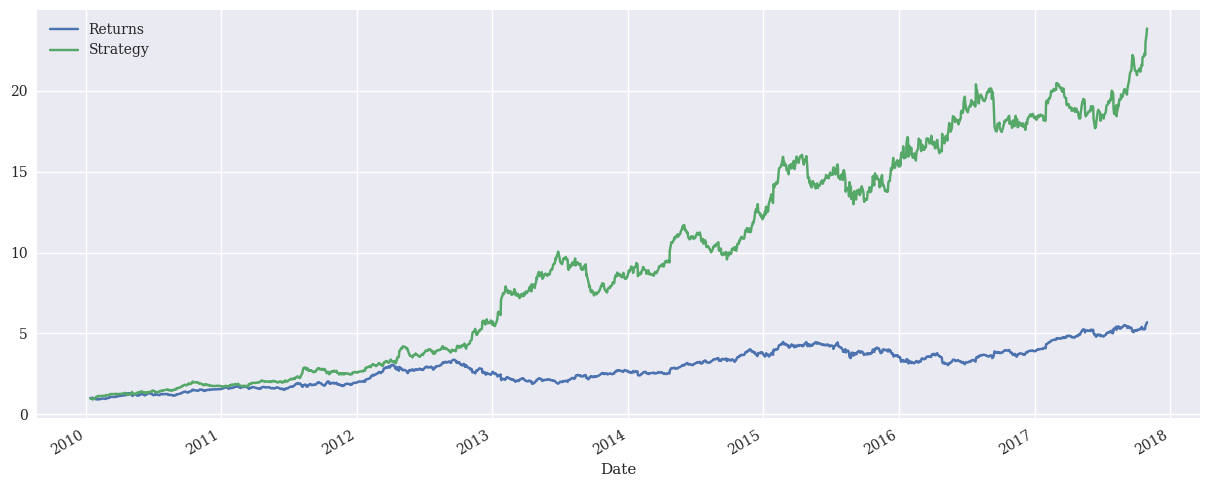

In [42]:
data[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(15, 6));

## Basic Analytics

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1965 entries, 2010-01-13 to 2017-10-31
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AAPL.O      1965 non-null   float64
 1   Returns     1965 non-null   float64
 2   lag_1       1965 non-null   float64
 3   lag_2       1965 non-null   float64
 4   lag_3       1965 non-null   float64
 5   lag_4       1965 non-null   float64
 6   lag_5       1965 non-null   float64
 7   lag_6       1965 non-null   float64
 8   Prediction  1965 non-null   float64
 9   Strategy    1965 non-null   float64
dtypes: float64(10)
memory usage: 168.9 KB


In [44]:
data.describe()

,AAPL.O,Returns,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,Prediction,Strategy
count,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000
mean,86.730823,0.000885,0.051399,0.050382,0.050382,0.049364,0.049364,0.049364,0.165394,0.001614
std,33.937289,0.016063,0.998423,0.998474,0.998474,0.998525,0.998525,0.998525,0.986479,0.016006
min,27.435687,-0.131875,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.083303
25%,57.812799,-0.006947,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.006432
50%,84.822772,0.000890,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.001647
75%,111.950000,0.009691,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.010084
max,169.040000,0.085022,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.131875


In [45]:
data.sum()

AAPL.O        170426.067233
Returns            1.739856
lag_1            101.000000
lag_2             99.000000
lag_3             99.000000
lag_4             97.000000
lag_5             97.000000
lag_6             97.000000
Prediction       325.000000
Strategy           3.171903
dtype: float64

In [46]:
data.mean()

AAPL.O        86.730823
Returns        0.000885
lag_1          0.051399
lag_2          0.050382
lag_3          0.050382
lag_4          0.049364
lag_5          0.049364
lag_6          0.049364
Prediction     0.165394
Strategy       0.001614
dtype: float64

In [47]:
data.mean(axis=0)

AAPL.O        86.730823
Returns        0.000885
lag_1          0.051399
lag_2          0.050382
lag_3          0.050382
lag_4          0.049364
lag_5          0.049364
lag_6          0.049364
Prediction     0.165394
Strategy       0.001614
dtype: float64

In [48]:
data.mean(axis=1)

Date
2010-01-13     2.709283
2010-01-14     2.691854
2010-01-15     2.838484
2010-01-19     2.771997
2010-01-20     2.724640
                ...    
2017-10-25    15.541000
2017-10-26    15.441000
2017-10-27    16.412041
2017-10-30    16.976452
2017-10-31    17.206764
Length: 1965, dtype: float64

In [49]:
data.cumsum()

,AAPL.O,Returns,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,Prediction,Strategy
Date,,,,,,,,,,
2010-01-13,30.092827,0.014007,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-0.014007
2010-01-14,60.011369,0.008199,0.0,-2.0,0.0,0.0,-2.0,0.0,-2.0,-0.008199
2010-01-15,89.429911,-0.008655,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.025052
2010-01-19,120.149880,0.034633,-2.0,-2.0,0.0,-2.0,-2.0,0.0,-2.0,-0.068340
2010-01-20,150.396278,0.019097,-1.0,-3.0,-1.0,-1.0,-3.0,-1.0,-3.0,-0.052804
...,...,...,...,...,...,...,...,...,...,...
2017-10-25,169769.847233,1.662201,99.0,97.0,99.0,97.0,97.0,99.0,323.0,3.106995
2017-10-26,169927.257233,1.668574,98.0,98.0,98.0,98.0,96.0,98.0,322.0,3.100622
2017-10-27,170090.307233,1.703777,99.0,97.0,99.0,97.0,97.0,97.0,323.0,3.135825


In [50]:
np.log(data)

/usr/local/lib/python3.9/dist-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.9/dist-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


,AAPL.O,Returns,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,Prediction,Strategy
Date,,,,,,,,,,
2010-01-13,3.404287,-4.268200,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
2010-01-14,3.398478,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,-5.148444
2010-01-15,3.381625,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN
2010-01-19,3.424913,-3.139886,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
2010-01-20,3.409377,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,-4.164609
...,...,...,...,...,...,...,...,...,...,...
2017-10-25,5.052481,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,-5.425746
2017-10-26,5.058854,-5.055669,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN
2017-10-27,5.094057,-3.346623,0.0,NaN,0.0,NaN,0.0,NaN,0.0,-3.346623


In [51]:
np.sqrt(abs(data))

,AAPL.O,Returns,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,Prediction,Strategy
Date,,,,,,,,,,
2010-01-13,5.485693,0.118351,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.118351
2010-01-14,5.469784,0.076213,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.076213
2010-01-15,5.423886,0.129820,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.129820
2010-01-19,5.542560,0.208057,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.208057
2010-01-20,5.499673,0.124643,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.124643
...,...,...,...,...,...,...,...,...,...,...
2017-10-25,12.506398,0.066346,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.066346
2017-10-26,12.546314,0.079832,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.079832
2017-10-27,12.769103,0.187625,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.187625


In [52]:
np.sqrt(abs(data)).sum()

AAPL.O        17928.752153
Returns         189.115434
lag_1          1963.000000
lag_2          1963.000000
lag_3          1963.000000
lag_4          1963.000000
lag_5          1963.000000
lag_6          1963.000000
Prediction     1965.000000
Strategy        189.115434
dtype: float64

In [54]:
100 * data + 100

,AAPL.O,Returns,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,Prediction,Strategy
Date,,,,,,,,,,
2010-01-13,3109.282705,101.400697,0.0,0.0,200.0,0.0,0.0,200.0,0.0,98.599303
2010-01-14,3091.854151,99.419157,200.0,0.0,0.0,200.0,0.0,0.0,0.0,100.580843
2010-01-15,3041.854201,98.314675,0.0,200.0,0.0,0.0,200.0,0.0,200.0,98.314675
2010-01-19,3171.996928,104.328775,0.0,0.0,200.0,0.0,0.0,200.0,0.0,95.671225
2010-01-20,3124.639833,98.446421,200.0,0.0,0.0,200.0,0.0,0.0,0.0,101.553579
...,...,...,...,...,...,...,...,...,...,...
2017-10-25,15741.000000,99.559822,200.0,0.0,200.0,0.0,0.0,200.0,0.0,100.440178
2017-10-26,15841.000000,100.637310,0.0,200.0,0.0,200.0,0.0,0.0,0.0,99.362690
2017-10-27,16405.000000,103.520304,200.0,0.0,200.0,0.0,200.0,0.0,200.0,103.520304


## Basic Visualization

<ipython-input-63-488ce86155e2>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


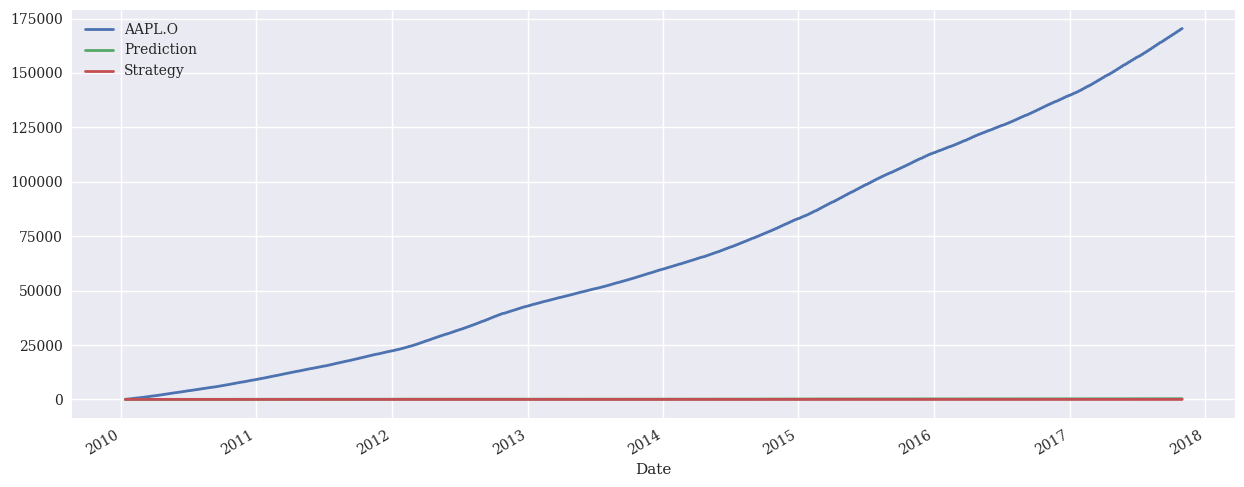

In [63]:
from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

data[['AAPL.O', 'Prediction', 'Strategy']].cumsum().plot(lw=2.0, figsize=(15, 6));

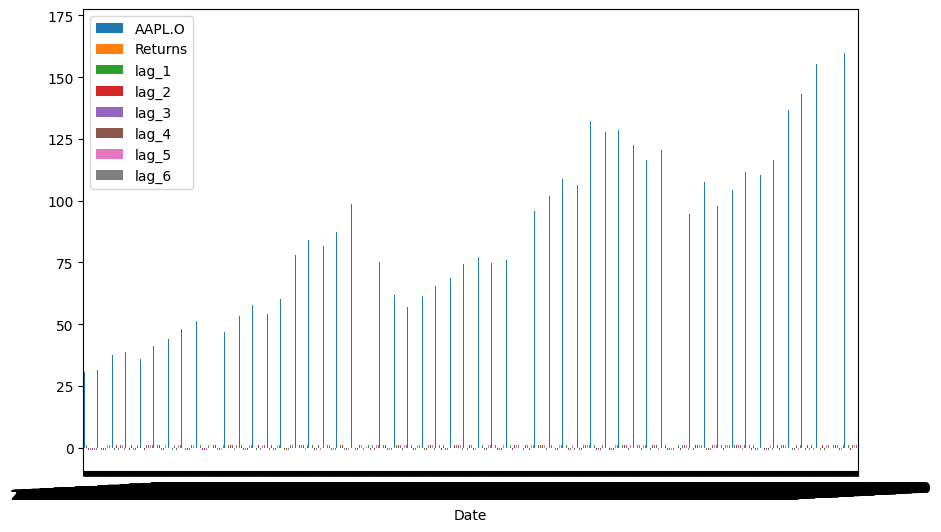

In [9]:
data.plot.bar(figsize=(10, 6), rot=3);

## Financial Data Science

### Data Visualization

In [ ]:
## Static 2D Plotting